In [4]:
%matplotlib nbagg
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print("start!")
"""
Mnorm=np.arange(20)
Mnorm=Mnorm/10+0.1
y=np.arange(20)
print(Mnorm)
rnorm=np.zeros(20)
for i in range(20):
    y[i]=((Mnorm[i]**(4/2))*2.9)
    rnorm[i]=1/((Mnorm[i]**(4/2))*2.9)
    print(rnorm[i],Mnorm[i])
print(y)
"""

import scipy.optimize
Mlog=[0,-0.03,-0.11,-0.16,-0.33,-0.41,-0.67,-1.0,-10**9,-10**9,-10**10]
Llog=[0,-0.1,-0.4,-0.8,-1.2,-1.5,-2.1,-3.1,-10**5,-10**6,-10**7]
M=np.exp(Mlog)
L=np.exp(Llog)
X=np.linspace(1,0.1,10)
parameter_initial = np.array([0,0])
def func(x,a,b):
    return  b * np.exp(x)+a
j=4
paramater_optimal1, covariance = scipy.optimize.curve_fit(func, M[:j], L[:j], p0=parameter_initial)
paramater_optimal2, covariance = scipy.optimize.curve_fit(func, M[j:], L[j:], p0=parameter_initial)
y1 = func(X,paramater_optimal1[0],paramater_optimal1[1])
y2 = func(X,paramater_optimal2[0],paramater_optimal2[1])
k=3
Y1=y1[0]/y1[:k]
Y2=y1[0]/y2[k:]
rrnorm=np.concatenate([Y1,Y2])
rnorm =rrnorm[::-1]/2.9
print (rnorm)


ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 2409))
N = 2409  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=2
#for i in range(8):
#    if i==2
i=2
fol=format(i, '03b')
for j in range(10):
        #numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
        if(j==7):
            print(fname,numb)
            #print(dataall.nbytes)
#print(dataall.shape)
print("end")

start!
[28.48237767  8.33136102  4.67555408  3.14862779  2.31359748  1.78919192
  1.43078043  1.13203769  0.54309236  0.34482759]
[]
end


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec

box_size_xmin = 0.1
box_size_xmax = 1000
box_size_ymin = 1e-05
box_size_ymax = 1e+05

<IPython.core.display.Javascript object>


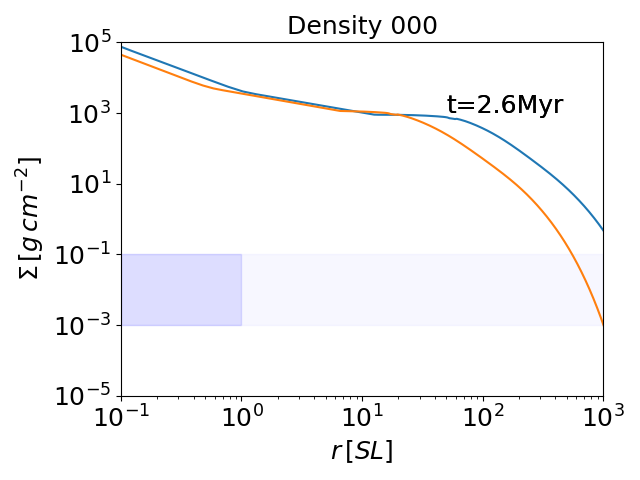

1
2


In [6]:
fig = plt.figure()
print("1")
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[SL]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 000', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.05)
    testx2 = [1e-01,1000,1000,1e-01]
    testy2 = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx2,testy2,color="b",alpha=0.015)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()

cmap=plt.get_cmap("tab10")
k=0
def updata(i):
  #if i != 0:
  plt.cla()
  for j in range(10):
      k=j+1
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      xn=np.dot(x,rnorm[j%10])
      plt.plot(xn, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
ani.save("animelongs10.gif", writer="imagemagick")
ani.save('animelongs10.mp4', writer="ffmpeg")
print("2")

In [19]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[SL]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 001', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.9)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+11
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_1snow4.gif", writer="imagemagick")
ani.save('anime7_1snow4.mp4', writer="ffmpeg")
print("2")

<IPython.core.display.Javascript object>

2


In [20]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 010', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+21
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_2snow4.gif", writer="imagemagick")
ani.save('anime7_2snow4.mp4', writer="ffmpeg")
print("2")

<IPython.core.display.Javascript object>

2


In [21]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 011', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+31
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y,color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_3snow4.gif", writer="imagemagick")
ani.save('anime7_3snow4.mp4', writer="ffmpeg")
print("2")

<IPython.core.display.Javascript object>

2


In [22]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 100', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+41
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_4snow4.gif", writer="imagemagick")
ani.save('anime7_4snow4.mp4', writer="ffmpeg")
print("2")

<IPython.core.display.Javascript object>

2


In [ ]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 101', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+51
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_5snow4.gif", writer="imagemagick")
ani.save('anime7_5snow4.mp4', writer="ffmpeg")
print("2")

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 110', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+61
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_6snow4.gif", writer="imagemagick")
ani.save('anime7_6snow4.mp4', writer="ffmpeg")
print("2")

In [ ]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 111', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(10):
      k=j+71
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_7snow4.gif", writer="imagemagick")
ani.save('anime7_7snow4.mp4', writer="ffmpeg")
print("2")

In [ ]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 000', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(8):
      k=j*10+1
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_M02.gif", writer="imagemagick")
ani.save('anime7_M02.mp4', writer="ffmpeg")
print("2")

In [ ]:
fig = plt.figure()
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 000', fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    testx = [1e-01,1,1,1e-01]
    testy = [1e-03,1e-03,1e-01,1e-01]
    plt.fill(testx,testy,color="b",alpha=0.2)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(8):
      k=j*10+2
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("anime7_M022.gif", writer="imagemagick")
ani.save('anime7_M022.mp4', writer="ffmpeg")
print("2")

In [ ]:

ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 809))
N = 809  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=1
for i in range(8):
    fol=format(i, '03b')
    for j in range(10):
        numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
        if(j==7):
            print(fname,numb)
            #print(dataall.nbytes)
#print(dataall.shape)
print("end")

#111 M01-M10
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec

box_size_xmin = 0.01
box_size_xmax = 1e4
box_size_ymin = 1e-12
box_size_ymax = 1e+10

fig = plt.figure()
#pltdat=dataall[:,:,62]
print("1")
class Init:
  def __init__(self, i):
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$r\,[au]$', fontsize=18)
    plt.ylabel(r'$\Sigma\, [g\,cm^{-2}]$', fontsize=18)
    plt.xlim(box_size_xmin, box_size_xmax)
    plt.ylim(box_size_ymin, box_size_ymax)
    plt.title('Density 111', fontsize=18)
    #plt.text(50, 1000, "t=%d"%(i*100), fontsize=18)
    plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
    plt.tick_params(labelsize=18)
    mpl.rcParams['axes.xmargin'] = 0
    mpl.rcParams['axes.ymargin'] = 0
    plt.tight_layout()

cmap=plt.get_cmap("tab10")  
k=0
def updata(i):
  if i != 0:
    plt.cla()
  for j in range(3):
      k=j+64
      pltdat=dataall[:,:,k]
      Init(i)
      #data = np.loadtxt("./dust%d.dat" % (i*5));
      x = []
      y = []
      x.extend(pltdat[:,0])
      y.extend(pltdat[:,i+1])
      x=np.dot(x,rnorm[j%10])
      plt.plot(x, y, color=cmap(j))
      #im=plt.plot(pltdat[:,0],pltdat[:,l+2],color="r")
 
ani = animation.FuncAnimation(fig, updata, interval=100, frames=100)
ani.save("test3-45.gif", writer="imagemagick")
ani.save('test3-45.mp4', writer="ffmpeg")
print("2")